<a href="https://colab.research.google.com/github/Akanerd/NaturalLanguangeProcessing-Orbit/blob/main/Muhammad_Hafizh_Azzasafah_Kelas_Jatayu_Tugas_NLP_Case_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle

%matplotlib inline

In [2]:
!pip -q install sastrawi

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Text Preprocessing

## Case Folding

In [4]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
  text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
  text = text.strip()
  return text

## Word Normalization

In [5]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-03-30 15:06:38--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.1’

key_norm.csv.1      100%[===================>]  79.07K  --.-KB/s    in 0.02s   

2022-03-30 15:06:38 (5.05 MB/s) - ‘key_norm.csv.1’ saved [80969/80969]



In [6]:
key_norm = pd.read_csv('https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv')

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

## Filtering (Stopword Removal)

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [8]:
len(stopwords_ind)

758

In [9]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [10]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['tsel', 'gb', 'rb']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

## Stemming

In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

## Text Preprocessing Pipeline

In [12]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

# Student Activity
Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

! Ingat <br>
Kolom Ratings adalah target anda.

Tugas Anda:
- mahasiswa ditugaskan untuk menemukan model terbaik. Mahasiswa bisa menggunakan algoritme supervised learning lainnya 

Setelah dikerjakan, buatlah resume berdasarkan pengalaman Anda dalam membuat model ML dan proses evaluasinya

Penamaan file - NamaLengkap_NamaKelas

Kumpulkan tugas Anda pada: https://s.id/tugas-nlp-ofa



##  Isi resume di sini yah

Resume ......

# Load Dataset

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/Akanerd/NaturalLanguangeProcessing-Orbit/main/20191002-reviews.csv',nrows=7000)
data = data[['reviewContent','rating']]
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 0 to 6998
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewContent  3461 non-null   object
 1   rating         3461 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.1+ KB


# Visualisasi Distribusi Data

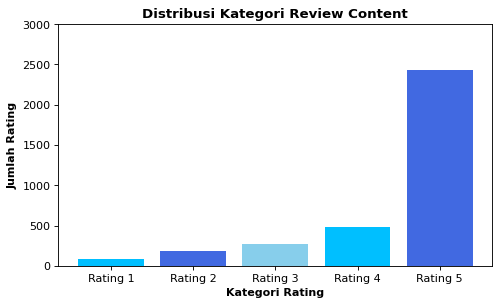

In [15]:
height = data['rating'].value_counts().sort_values(ascending=True)
labels = ('Rating 1','Rating 2','Rating 3','Rating 4','Rating 5')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,3000)
plt.title('Distribusi Kategori Review Content', fontweight='bold')
plt.xlabel('Kategori Rating', fontweight='bold')
plt.ylabel('Jumlah Rating', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

In [16]:
label=[]
for index, row in data.iterrows():
    if row['rating']==5:
        label.append(1)  
    else:
      label.append(0)


data['label']=label
data_lazada=data.drop(columns='rating', axis=1)
data_lazada.head()

,reviewContent,label
0,bagus mantap dah sesui pesanan,1
1,"Bagus, sesuai foto",0
2,okkkkk mantaaaaaaapppp ... goood,1
3,bagus sesuai,0
7,bima,0


# Text Preprocessing Pipeline

In [17]:
%%time
data['clean_teks'] = data_lazada['reviewContent'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

CPU times: user 8min 6s, sys: 1.54 s, total: 8min 7s
Wall time: 8min 24s


In [18]:
data

,reviewContent,rating,label,clean_teks
0,bagus mantap dah sesui pesanan,5,1,bagus mantap sesui pesan
1,"Bagus, sesuai foto",4,0,bagus sesuai foto
2,okkkkk mantaaaaaaapppp ... goood,5,1,okkkkk mantaaaaaaapppp goood
3,bagus sesuai,4,0,bagus sesuai
7,bima,1,0,bima
...,...,...,...,...
6994,"Barang sdh diterima dgn baik, tp tdk ada kartu...",4,0,barang terima kartu garansi mohon cerah trims
6995,Bagus... Tp gak tw cara anti virusnya,5,1,bagus tw anti virus
6996,"pesan barang, bayar dan sampai dengan selamat",4,0,pesan barang bayar selamat
6997,"standar hard disk aja sih, tp pouchnya lumayan...",4,0,standar hard disk sih pouchnya lumayan bgs


# Feature Engineering

In [19]:
# Pisahkan kolom feature dan target
X = data['clean_teks']
y = data['label']

In [20]:
X


0                                bagus mantap sesui pesan
1                                       bagus sesuai foto
2                            okkkkk mantaaaaaaapppp goood
3                                            bagus sesuai
7                                                    bima
                              ...                        
6994        barang terima kartu garansi mohon cerah trims
6995                                  bagus tw anti virus
6996                           pesan barang bayar selamat
6997           standar hard disk sih pouchnya lumayan bgs
6998    mantap barang packing ok ragu beli barang frag...
Name: clean_teks, Length: 3461, dtype: object

In [21]:
y

0       1
1       0
2       1
3       0
7       0
       ..
6994    0
6995    1
6996    0
6997    0
6998    1
Name: label, Length: 3461, dtype: int64

# Feature Extraction (TF-IDF & N-Gram)

Proses mengubah teks menjadi vector menggunakan metode TF-IDF

In [22]:
#save model
import pickle

#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

#Save vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf_tugas_1.pkl","wb"))

In [23]:
#Menampilkan vocabulary dari TF-IDF
vec_TF_IDF.vocabulary_

{'bagus': 190,
 'mantap': 1897,
 'sesui': 2922,
 'pesan': 2454,
 'sesuai': 2916,
 'foto': 1069,
 'okkkkk': 2256,
 'mantaaaaaaapppp': 1877,
 'goood': 1169,
 'bima': 400,
 'layar': 1743,
 'gar': 1117,
 'rabu': 2598,
 'soreminggu': 3019,
 'sore': 3018,
 'sampebarang': 2789,
 'specs': 3032,
 'mantabtks': 1891,
 'lazada': 1748,
 'cicil': 620,
 'pakai': 2345,
 'yacc': 3537,
 'televisi': 3176,
 'suda': 3078,
 'anti': 113,
 'gores': 1171,
 'kirim': 1600,
 'barang': 285,
 'janji': 1384,
 'express': 1011,
 'jumat': 1438,
 'moga': 2050,
 'awet': 165,
 'kualitas': 1674,
 'ok': 2237,
 'led': 1776,
 'merek': 1988,
 'sharp': 2930,
 'hitam': 1266,
 'lc': 1771,
 'lei': 1779,
 'mati': 1935,
 'total': 3316,
 'mana': 1869,
 'hubung': 1284,
 'bantu': 277,
 'mohon': 2051,
 'bijak': 396,
 'solusi': 3014,
 'garansi': 1120,
 'terimakasih': 3206,
 'super': 3098,
 'sich': 2943,
 'tahan': 3119,
 'cra': 674,
 'nya': 2179,
 'cepat': 578,
 'sipplahhh': 2973,
 'ne': 2107,
 'laptop': 1732,
 'packaging': 2324,
 'good':

In [24]:
#Melihat Jumlah Fitur
print (len(vec_TF_IDF.get_feature_names()))

3566


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(vec_TF_IDF.get_feature_names())

['abal', 'abang', 'accessories', 'aceh', 'activation', 'activationnyacode', 'ada', 'adaada', 'adados', 'adahanya', 'adapter', 'adapternya', 'adaptor', 'adata', 'adatks', 'adatp', 'add', 'adek', 'adem', 'admin', 'aduhh', 'afee', 'afiat', 'aga', 'againnnnnnmooooooore', 'agan', 'agen', 'agustus', 'ah', 'ahh', 'aip', 'air', 'airgaransi', 'ajaaaaa', 'ajaib', 'ajak', 'ajar', 'ajatolong', 'ajib', 'ajj', 'aju', 'akai', 'akalakalan', 'akalin', 'akh', 'akibat', 'akn', 'aktif', 'aktifasi', 'aktifikasi', 'aktivasi', 'aktivasinya', 'aktivasitaapi', 'aktual', 'akun', 'akur', 'akurat', 'alam', 'alamat', 'alas', 'alat', 'alesan', 'alhamdulil', 'alhamdulillaah', 'alhamdulillah', 'alhamdullilah', 'alhasil', 'alhmdlh', 'alhmdlillah', 'alhmdulillah', 'alias', 'all', 'allah', 'allahmdulillah', 'alloh', 'alm', 'alngkah', 'aluminium', 'alumunium', 'am', 'aman', 'amanah', 'amanbagus', 'amanbaik', 'amanbeneran', 'amandan', 'amanmatur', 'amansemoga', 'ambil', 'amiiiin', 'amiiin', 'amiin', 'amin', 'ampas', 'ampl

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vec_TF_IDF.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vec_TF_IDF.get_feature_names())
data_tabular_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abal,abang,accessories,aceh,activation,activationnyacode,ada,adaada,adados,adahanya,...,your,youtube,yra,yya,zada,zeb,zenfone,zippernya,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
data_tabular_tf_idf.iloc[10:20,60:70]

,alat,alesan,alhamdulil,alhamdulillaah,alhamdulillah,alhamdullilah,alhasil,alhmdlh,alhmdlillah,alhmdulillah
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [28]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
x_train = np.array(data_tabular_tf_idf)
y_train = np.array(y)

In [29]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k = 2000) 
X_kbest_features = chi2_features.fit_transform(x_train, y_train) 
  
# Reduced features 
print('Original feature number:', x_train.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 3566
Reduced feature number: 2000


In [30]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
Data =pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
Data

,Nilai
0,0.469955
1,0.749160
2,0.271676
3,0.514684
4,0.279829
...,...
3561,0.201397
3562,0.167633
3563,1.344169
3564,1.005175


In [31]:
#Menampilkan fitur beserta nilainya
feature =vec_TF_IDF.get_feature_names()
feature

Data['Fitur'] = feature
Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Nilai,Fitur
0,0.469955,abal
1,0.749160,abang
2,0.271676,accessories
3,0.514684,aceh
4,0.279829,activation
...,...,...
3561,0.201397,zeb
3562,0.167633,zenfone
3563,1.344169,zippernya
3564,1.005175,zone


In [32]:
#Mengurutkan fitur terbaik
Data.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
2051,1.678908e+01,mohon
1897,1.605988e+01,mantap
1309,1.494093e+01,inch
2744,1.489559e+01,rusak
3304,1.132160e+01,tolong
...,...,...
3192,4.223332e-05,tentu
3510,2.345511e-05,wlpun
3006,1.254936e-05,softcase
2191,7.493860e-08,nyaman


In [33]:
#Menampilkan mask pada feature yang diseleksi
#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask =chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [34]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square
new_feature=[]
for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['abal',
 'abang',
 'accessories',
 'aceh',
 'activation',
 'activationnyacode',
 'adaada',
 'adados',
 'adahanya',
 'adapter',
 'adapternya',
 'adaptor',
 'adatp',
 'adem',
 'afee',
 'agan',
 'agen',
 'agustus',
 'ah',
 'aip',
 'ajaaaaa',
 'ajar',
 'ajatolong',
 'ajib',
 'ajj',
 'aju',
 'akai',
 'akibat',
 'akn',
 'aktif',
 'aktifasi',
 'aktivasi',
 'aktivasitaapi',
 'aktual',
 'akun',
 'akur',
 'alam',
 'alamat',
 'alas',
 'alat',
 'alesan',
 'alhamdulillah',
 'alhasil',
 'alhmdlh',
 'alhmdlillah',
 'alhmdulillah',
 'alias',
 'allah',
 'aman',
 'amanah',
 'amanbagus',
 'amandan',
 'amanmatur',
 'amansemoga',
 'amin',
 'ampas',
 'an',
 'and',
 'anda',
 'andai',
 'android',
 'aneka',
 'angge',
 'anime',
 'anjur',
 'annti',
 'antar',
 'antena',
 'anter',
 'anti',
 'antivirus',
 'antivirusnya',
 'antivirusx',
 'anyway',
 'aowkwowkwok',
 'ap',
 'apa',
 'apik',
 'apkah',
 'app',
 'april',
 'aqua',
 'aquanya',
 'arah',
 'arduino',
 'aryo',
 'as',
 'asalamualaikum',
 'asalasalan',
 'aslialia

In [35]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_features[k] = v

new_selected_features


{'bagus': 190,
 'mantap': 1897,
 'sesui': 2922,
 'sesuai': 2916,
 'foto': 1069,
 'goood': 1169,
 'bima': 400,
 'layar': 1743,
 'gar': 1117,
 'sore': 3018,
 'sampebarang': 2789,
 'lazada': 1748,
 'cicil': 620,
 'pakai': 2345,
 'yacc': 3537,
 'televisi': 3176,
 'anti': 113,
 'gores': 1171,
 'barang': 285,
 'janji': 1384,
 'express': 1011,
 'moga': 2050,
 'awet': 165,
 'kualitas': 1674,
 'ok': 2237,
 'led': 1776,
 'hitam': 1266,
 'lc': 1771,
 'lei': 1779,
 'mati': 1935,
 'total': 3316,
 'mana': 1869,
 'hubung': 1284,
 'mohon': 2051,
 'bijak': 396,
 'solusi': 3014,
 'garansi': 1120,
 'terimakasih': 3206,
 'super': 3098,
 'sich': 2943,
 'tahan': 3119,
 'cra': 674,
 'nya': 2179,
 'cepat': 578,
 'sipplahhh': 2973,
 'ne': 2107,
 'laptop': 1732,
 'packaging': 2324,
 'good': 1163,
 'oke': 2241,
 'jual': 1429,
 'terima': 3200,
 'selamat': 2861,
 'produk': 2541,
 'deskripsi': 774,
 'kotakom': 1663,
 'senang': 2893,
 'selasa': 2862,
 'top': 3311,
 'test': 3235,
 'capek': 551,
 'tolak': 3302,
 'miri

In [36]:
#Melihat jumlah fitur baru 
#Ini sesuai dengan nilai k pada chi-square
len(new_selected_features)

2000

In [37]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf_Tugas_1.pkl","wb"))

In [38]:
#Menampilkan Fitur-fitur yang sudah diseleksi 
#beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses Machine learning

#menampilkan fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features,columns=selected_feature)
data_selected_feature

,abal,abang,accessories,aceh,activation,activationnyacode,adaada,adados,adahanya,adapter,...,yanpa,yapersyaratan,yaseller,yeayy,yess,ygcabang,youtube,zippernya,zone,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
data_selected_feature.iloc[10:20,60:70]

,android,aneka,angge,anime,anjur,annti,antar,antena,anter,anti
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modelling (Machine Learning)

In [41]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#Naive
from sklearn.naive_bayes import MultinomialNB

In [42]:
x = selected_x
y = data.label
#Memisahkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [43]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 2768
Banyak data x_test  : 693
Banyak data y_train : 2768
Banyak data y_test  : 693


In [44]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive_tugas.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.027452


In [45]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

# Model Evaluation - Naive bayes

In [46]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  535  data
prediksi salah:  158  data
Akurasi Algoritme:  77.2005772005772 %
TRUE NEGATIVE (TN): 54
FALSE NEGATIVE (FN): 5
TRUE POSITIVE (TP): 481
FALSE POSITIVE (FP): 153
PRECISION: 75.86750788643532 %
RECALL: 98.97119341563786 %
              precision    recall  f1-score   support

           0       0.92      0.26      0.41       207
           1       0.76      0.99      0.86       486

    accuracy                           0.77       693
   macro avg       0.84      0.63      0.63       693
weighted avg       0.81      0.77      0.72       693



In [47]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.73015873 0.75180375 0.76334776 0.78354978 0.73737374 0.74603175
 0.76046176 0.76623377 0.72438672 0.77344877]
accuracy:  0.7536796536796537


# Deployment _ Naive Bayes

In [48]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_naive_tugas.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf_Tugas_1.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==5):
    s ="Rating 5"
else:
    s ="Rating 1 - 4"
    
print("Hasil prediksi:\n", s) 

Masukkan sentiment:
kecewaaa
Hasil prediksi:
 Rating 1 - 4


# Modelling (Machine Learning) - KKN

In [82]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#SVM
from sklearn.neighbors import KNeighborsClassifier

In [83]:
x = selected_x
y = data.label
#Memisahkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [84]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 2768
Banyak data x_test  : 693
Banyak data y_train : 2768
Banyak data y_test  : 693


In [85]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = KNeighborsClassifier(n_neighbors = 3)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_svm_tugas.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.127632


In [86]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,

# Model Evaluation - KNN

In [87]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  479  data
prediksi salah:  214  data
Akurasi Algoritme:  69.11976911976912 %
TRUE NEGATIVE (TN): 24
FALSE NEGATIVE (FN): 31
TRUE POSITIVE (TP): 455
FALSE POSITIVE (FP): 183
PRECISION: 71.31661442006269 %
RECALL: 93.62139917695474 %
              precision    recall  f1-score   support

           0       0.44      0.12      0.18       207
           1       0.71      0.94      0.81       486

    accuracy                           0.69       693
   macro avg       0.57      0.53      0.50       693
weighted avg       0.63      0.69      0.62       693



In [88]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.68253968 0.65945166 0.7041847  0.72294372 0.66666667 0.7027417
 0.68398268 0.69408369 0.65223665 0.70562771]
accuracy:  0.6874458874458874


# Deployment-KNN

In [89]:
from joblib import load
#Hasil
pipeline = load("model_sentiment_svm_tugas.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing_process(data_input)

#Load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf_Tugas_1.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==5):
    s ="Rating 5"
else:
    s ="Rating 1 - 4"
    
print("Hasil prediksi:\n", s) 

Masukkan sentiment:
adada
Hasil prediksi:
 Rating 1 - 4
